In [1]:
from ImageLab import *
import numpy as np

Kernels

In [2]:
def diamond_kernel(n):
    # Create a grid of coordinates
    x, y = np.meshgrid(np.arange(n+1), np.arange(n+1))
    # Calculate the distance from the center of the grid
    r = np.abs(x - n/2) + np.abs(y - n/2)
    # Create a kernel that is 1 inside the diamond and 0 outside
    kernel = np.zeros((n+1, n+1))
    kernel[r <= n/2] = 1
    return kernel


def circle_kernel(n):
    # Create a grid of coordinates
    x, y = np.meshgrid(np.arange(n-1), np.arange(n-1))
    # Calculate the distance from the center of the grid
    r = np.sqrt((x+1 - n/2)**2 + (y+1 - n/2)**2)
    # Create a kernel that alternates 1's and 0's based on the distance from the center
    kernel = np.zeros((n-1, n-1))
    kernel[r < n/2] = 1
    kernel = kernel.astype(int)
    return kernel


vkernel3 = np.array([[0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0]])

vkernel1 = np.array([[0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0]])

hkernel3 = np.array([[0, 0, 0, 0, 0],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [0, 0, 0, 0, 0]])

hkernel1 = np.array([[0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0],
                    [1, 1, 1, 1, 1],
                    [0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0]])

xkernel1 = np.array([[1, 0, 0, 0, 1],
                    [0, 1, 0, 1, 0],
                    [0, 0, 1, 0, 0],
                    [0, 1, 0, 1, 0],
                    [1, 0, 0, 0, 1]])

xkernel3 = np.array([[1, 1, 0, 0, 0, 1, 1],
                    [1, 1, 1, 0, 1, 1, 1],
                    [0, 1, 1, 1, 1, 1, 0],
                    [0, 0, 1, 1, 1, 0, 0],
                    [0, 1, 1, 1, 1, 1, 0],
                    [1, 1, 1, 0, 1, 1, 1],
                    [1, 1, 0, 0, 0, 1, 1]])

tkernel1 = np.array([[0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [1, 1, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0]])

tkernel3 = np.array([[0, 0, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 0, 0],
                    [1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1],
                    [0, 0, 1, 1, 1, 0, 0],
                    [0, 0, 1, 1, 1, 0, 0]])

hsobel3 = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])

vsobel3 = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1]])

hcustom = np.array([[1, 2, 0],
                    [2, 0, -2],
                    [0, -2, -1]])
hcustom = hcustom/5

vcustom = np.array([[0, 2, 1],
                    [-2, 0, 2],
                    [-1, -2, 0]])
vcustom = vcustom/5

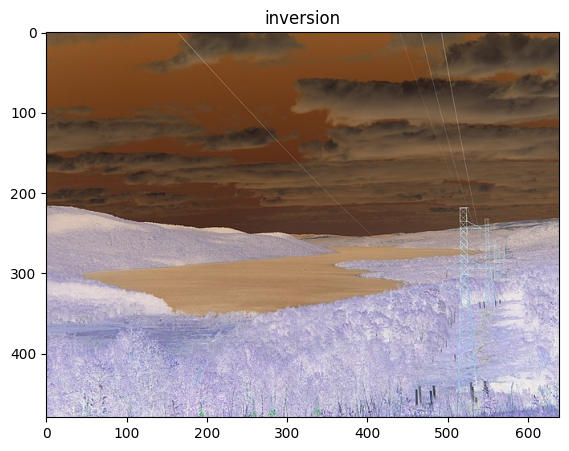

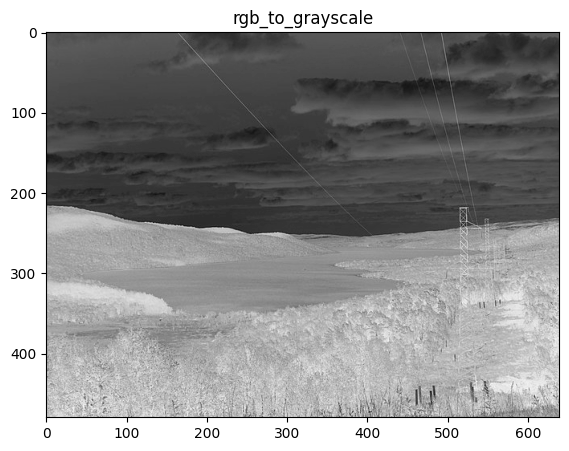

In [3]:
folder_name = 'PowerLineProject/Picture1/'

inverted, inverted_path = ColorSpace('Image/Panoramic_PowerLine.jpg', folder_name).process(inversion())
gray, inverted_path = ColorSpace(inverted_path, folder_name).process(rgb_to_grayscale())

Openning Kernel Experimentation

In [4]:
folder_name = 'Image/PowerLineProject/Picture1/'


# for i in range(3, 11, 2):
#     kernel = np.full((i,i), 1)
#     openned, openned_path = ImageProcessor(inverted_path, folder_name, f'openned_{i}').process(Dilation(), kernel)
#     openned, openned_path = ImageProcessor(openned_path, folder_name, f'openned_{i}').process(Erosion(), kernel)



Result: 7 seems to be fine. The squareness of the kernel may be an issue, however, it may also be a differentiator. The square kernel doesn't really 'squarify' the lines themselves.

Segmentation Experimentation

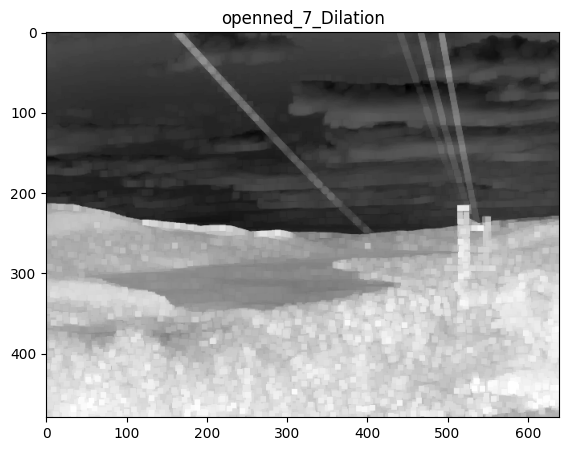

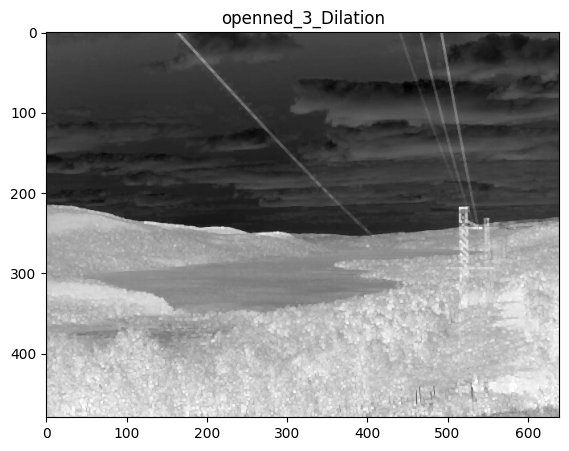

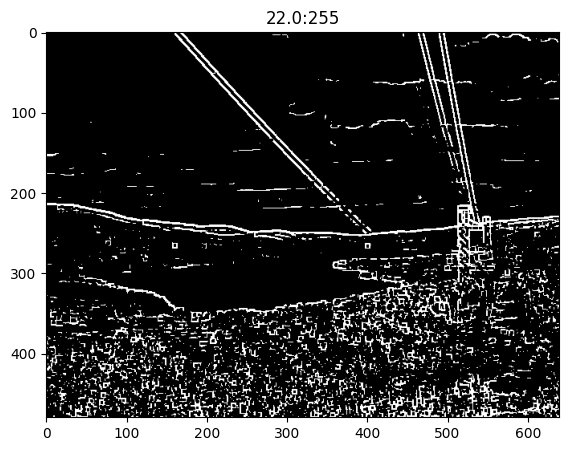

In [5]:
kernel = np.full((7,7), 1)
openned1, openned_path1 = ImageProcessor(inverted_path, folder_name, f'openned_7').process(Dilation(), np.full((7,7), 1))
#openned, openned_path = ImageProcessor(openned_path, folder_name, f'openned_7').process(Erosion(), kernel)
openned2, openned_path2 = ImageProcessor(inverted_path, folder_name, f'openned_3').process(Dilation(), np.full((3,3), 1))

diff = openned1 - openned2

diff_path = ImageUtil(diff).save_image_to_folder(folder_name, 'difference.png')

gt, gt_path = Segment(diff_path, folder_name, 'adaptive_threshold').process(Adaptive_Global_Threshold())

# for i in range(3, 11, 2):
#     segmented, segmented_path = Segment(openned_path1, folder_name, f'segmented_{i}').process(Pixel_Filter(i, func_type='Bernsen'))

Pixel-wise segmentation was limited in usefulness. Sauvola tended to filter out everything except the line between the sky and the ground. Niblack and Bernsen tended to create noise everywhere in the image - there may be an entropy-related way to fix this issue. The application of an adaptive threshold seemed to work the best.

Investigation continues through the exploration of edge filters. Edge filters of certain geometries can emphasize certain geometries.

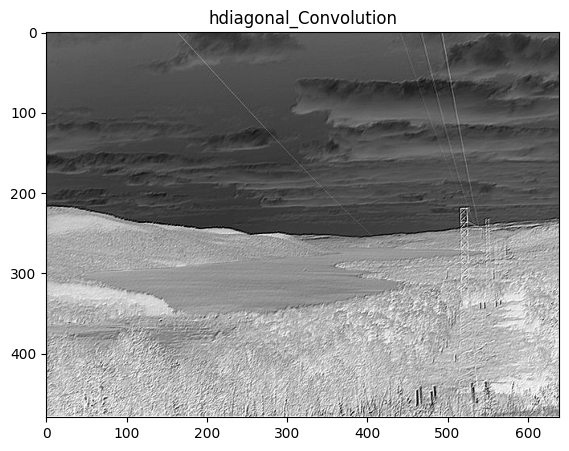

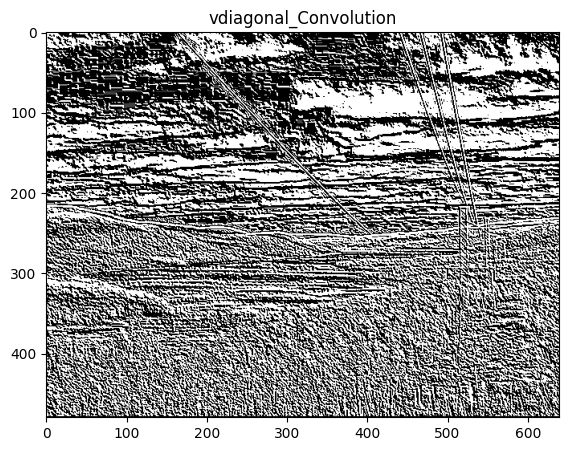

In [8]:
diagonal1, diagonal1_path = ImageProcessor(inverted_path, folder_name, 'hdiagonal').process(Convolution(), hcustom)
diagonal2, diagonal2_path = ImageProcessor(inverted_path, folder_name, 'vdiagonal').process(Convolution(), vcustom)